# Задание

На основе анонимизированных данных цифрового следа обучающихся в электронном обучающем курсе проверить гипотезу о наличии связи между активными действиями в электронном курсе и просмотрами. При наличии связи провести регрессионный анализ и подобрать оптимальный вид и параметры функциональной зависимости между переменными Активные действия и Просмотры. Сделать вывод.

Под **просмотрами** считать следующие названия событий: *['Модуль курса просмотрен', 'HotPot attempt reviewed', 'Страница вики просмотрена', 'Показана карта страниц Вики', 'Версия страницы вики просмотрена', 'Комментарии просмотрены',
'Запись просмотрена', 'Отзыв просмотрен', 'Страница состояния представленного ответа просмотрена', 'Глава просмотрена',
'Содержимое страницы просмотрено', 'Вопрос просмотрен', 'Ответ на задание типа «Эссе» просмотрен', 'Отчет просмотрен',
'Работа просмотрена', 'Попытка теста просмотрена', 'Завершенная попытка теста просмотрена', 'Сводка попытки теста просмотрена', 'Тема просмотрена', 'Отчет по пользователю просмотрен', 'Сессии просмотрены']*

Под **активными действиями** считать следующие названия событий: *['Ответ на анкету отправлен', 'Запись создана', 'Запись обновлена', 'Комментарий создан', 'Страница вики создана', 'Страница вики обновлена', 'Комментарий создан', 'Категория создана', 'Категория обновлена', 'Комментарий создан', 'Запись создана', 'Запись обновлена', 'Работа представлена.', 'Представленный ответ обновлен.', 'Комментарий создан', 'Дан ответ на вопрос', 'Лекция закончена', 'Ответ представлен', 'Ответ на опрос добавлен', 'Sco запущен', 'Посещаемость отмечена студентом', 'Работа оценена', 'Работа переоценена', 'Представление работы создано', 'Работа была загружена', 'Работа обновлена', 'Попытка теста завершена и отправлена на оценку', 'Тема создана', 'Сообщение создано', 'Отправлено сообщение']*

**Алгоритм действий:**
1. Считать данные.
2. Исключить данные до начала (до 01.09.2023) и после окончания (до 15.01.2024) осеннего семестра.
3. Агрегировать данные для каждого пользователя по количеству активных действий и просмотров в течение осеннего семестра.
4. Проверить гипотезу независимости критерием хи-квадрат Пирсона (учесть замечание по использованию критерия: $\nu_{ij}>5$).
5. Сделать вывод.
6. При наличии статистически значимой зависимости между количеством активных действий и просмотров, провести регрессионный анализ:
    - вычислить выборочный коэффициент корреляции Пирсона между количеством активных действий и просмотров, проверить его статистическую значимость, сделать вывод о возможности приближения зависимости между количеством активных действий и просмотров линейной функцией;
    - построить линейную регрессию количества активных действий от просмотров, оценить статистическую значимость коэффициентов уравнения линейной регрессии и значимость всего уравнения в целом;
    - проверить выполнение условия адекватности каждой из полученных моделей регрессии (нормальность распределения регрессионных остатков), построив Q-Q график;
    - выбрать еще 2-3 функциональные формы (квадратическая, логарифмическая, экспоненциальная, обратная и т.д.) зависимости количества активных действий от просмотров, оценить коэффициенты для каждого вида зависимости,  проверить выполнение условия адекватности моделей;
    - выбрать оптимальную модель на основании коэффициента детерминации;
    - с помощью оптимальной модели найти прогноз количества активных действий в курсе, произвольным образом задав для него значение просмотров.
7. Сделать выводы.

## Цифровой след из ЭОК по вариантам:
1. Высшая математика (09.03.03 Прикладная информатика). 1-й семестр (осень 2023)
2. Базовая математика (1 семестр) (осень 2023)
3. Теория вероятностей и математическая статистика (ИБ, программная инженерия) (осень 2023)
4. Теория вероятностей и математическая статистика - часть 2 (осень 2023)
5. Математический анализ (09.03.02.31 Разработка компьютерных игр и приложений) 1 семестр (осень 2023)
6. Теория вероятностей и математическая статистика (ИВТ) (осень 2023)
7. Математическая логика и теория алгоритмов ПАОС (осень 2023)
8. Математический анализ (ВТ) 1 семестр (осень 2023)
9. Математический анализ (Часть 1) (осень 2023)
10. Разработка программного обеспечения на языке Python (осень 2023)
11. Теория вероятности и математическая статистика (Разработка компьютерных игр и приложений) (осень 2023)

In [1]:
views = ['Модуль курса просмотрен', 'HotPot attempt reviewed', 'Страница вики просмотрена', 'Показана карта страниц Вики', 'Версия страницы вики просмотрена', 'Комментарии просмотрены',
'Запись просмотрена', 'Отзыв просмотрен', 'Страница состояния представленного ответа просмотрена', 'Глава просмотрена',
'Содержимое страницы просмотрено', 'Вопрос просмотрен', 'Ответ на задание типа «Эссе» просмотрен', 'Отчет просмотрен',
'Работа просмотрена', 'Попытка теста просмотрена', 'Завершенная попытка теста просмотрена', 'Сводка попытки теста просмотрена', 'Тема просмотрена', 'Отчет по пользователю просмотрен', 'Сессии просмотрены']
active = ['Ответ на анкету отправлен', 'Запись создана', 'Запись обновлена', 'Комментарий создан', 'Страница вики создана', 'Страница вики обновлена', 'Комментарий создан', 'Категория создана', 'Категория обновлена', 'Комментарий создан', 'Запись создана', 'Запись обновлена', 'Работа представлена.', 'Представленный ответ обновлен.', 'Комментарий создан', 'Дан ответ на вопрос', 'Лекция закончена', 'Ответ представлен', 'Ответ на опрос добавлен', 'Sco запущен', 'Посещаемость отмечена студентом', 'Работа оценена', 'Работа переоценена', 'Представление работы создано', 'Работа была загружена', 'Работа обновлена', 'Попытка теста завершена и отправлена на оценку', 'Тема создана', 'Сообщение создано', 'Отправлено сообщение']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('df_var_10.csv')
df["Время"] = pd.to_datetime(df["Время"], format="%Y-%m-%d %H:%M:%S")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275779 entries, 0 to 275778
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Время                    275779 non-null  datetime64[ns]
 1   Полное имя пользователя  248362 non-null  object        
 2   Затронутый пользователь  60934 non-null   object        
 3   Контекст события         275779 non-null  object        
 4   Компонент                275779 non-null  object        
 5   Название события         275779 non-null  object        
 6   Источник                 275779 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 14.7+ MB


In [4]:
df.describe(include="object")

,Полное имя пользователя,Затронутый пользователь,Контекст события,Компонент,Название события,Источник
count,248362,60934,275779,275779,275779,275779
unique,662,719,106,20,73,4
top,c399bfb7f172272d7dcfacf292fe1b9a,ffdf6968c44c0efa0ccbe648ef582d0b,Курс: Разработка программного обеспечения на я...,Задание,Модуль курса просмотрен,web
freq,14936,838,70679,98919,86491,274685


In [5]:
#Исключить данные до начала (до 01.09.2023) и после окончания (до 15.01.2024) осеннего семестра
df = df[(df["Время"] >= "2023-09-01") & (df["Время"] <= "2024-01-15")]
df.describe()

,Время
count,98355
mean,2023-10-29 21:17:36.319658496
min,2023-09-02 00:00:00
25%,2023-10-04 12:59:00
50%,2023-11-05 19:02:00
75%,2023-11-23 17:37:00
max,2024-01-14 20:43:00


In [6]:
#добавить столбцы is_active, is_view для событий
df['is_active'] = df["Название события"].apply(lambda x: 1 if x in active else 0)
df['is_view'] = df["Название события"].apply(lambda x: 1 if x in views else 0)
df.head()

,Время,Полное имя пользователя,Затронутый пользователь,Контекст события,Компонент,Название события,Источник,is_active,is_view
484,2024-01-02 12:58:00,e183e099e8dcfa9514593f8e0f38090f,NaN,Курс: Разработка программного обеспечения на я...,Система,Курс просмотрен,web,0,0
485,2024-01-02 10:44:00,723da1798d02be192c9217409bc1064d,NaN,Задание: ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА,Задание,Страница состояния представленного ответа прос...,web,0,1
486,2024-01-02 10:44:00,723da1798d02be192c9217409bc1064d,723da1798d02be192c9217409bc1064d,Задание: ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА,Задание,Отзыв просмотрен,web,0,1
487,2024-01-02 10:44:00,723da1798d02be192c9217409bc1064d,NaN,Задание: ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА,Задание,Модуль курса просмотрен,web,0,1
488,2024-01-02 10:44:00,723da1798d02be192c9217409bc1064d,NaN,Задание: Стажировка,Задание,Страница состояния представленного ответа прос...,web,0,1


In [7]:
#3. Агрегировать данные для каждого пользователя по количеству активных действий и просмотров в течение осеннего семестра.
agg_df = df.groupby('Полное имя пользователя').agg({'is_active': 'sum', 'is_view': 'sum'}).reset_index()
agg_df.rename(columns={'is_active': 'total_active', 'is_view': 'total_views'}, inplace=True)
agg_df.head()

,Полное имя пользователя,total_active,total_views
0,0013cbbe04f4ef7e3b68427130879265,51,221
1,005b103b8dab7a44c8fa0032dd3ce71e,20,163
2,009811d0356ea306907acb74f86132b4,39,143
3,009844f1c773a4576914819aeb9aadc3,0,469
4,00c8ab9c7d42d289a27de525176419bf,1,50


In [8]:
# Пример: 3 интервала по квантилям
agg_df['active_group'] = pd.qcut(agg_df['total_active'], q=8, duplicates='drop')
agg_df['views_group']  = pd.qcut(agg_df['total_views'],  q=8, duplicates='drop')
contingency_table = pd.crosstab(agg_df['active_group'], agg_df['views_group'])

Chi2: 665.9370031135775, p-value: 2.5575192939496763e-122, dof: 28
Отвергаем нулевую гипотезу: существует связь между активными действиями и просмотрами.


Text(0.5, 1.0, 'Распределение активных действий и просмотров')

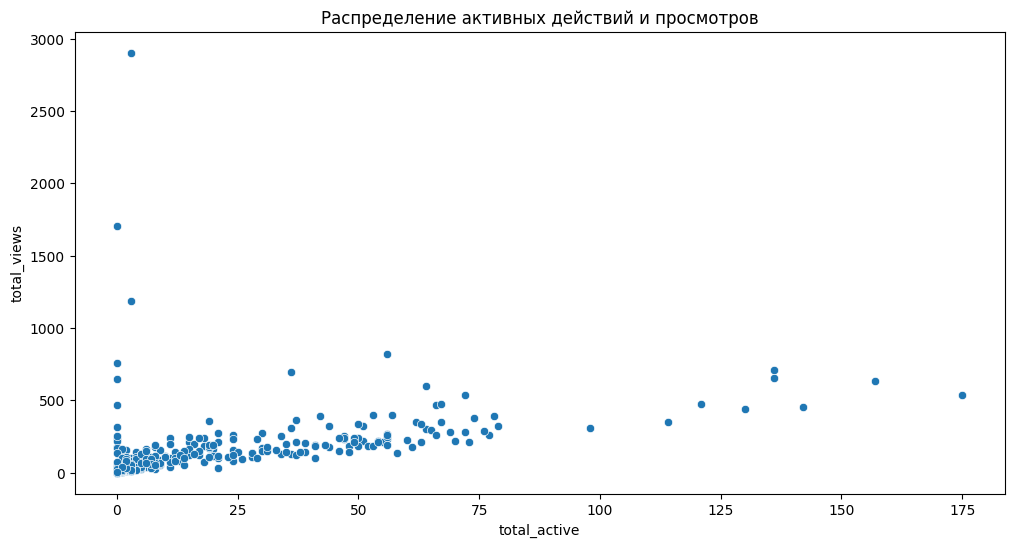

In [9]:
#проверить гипотезу о наличии связи между активными действиями в электронном курсе и просмотрами.
#роверить гипотезу независимости критерием хи-квадрат Пирсона (учесть замечание по использованию критерия: $\nu_{ij}>5$).
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}, dof: {dof}')
if p < 0.05:
    print("Отвергаем нулевую гипотезу: существует связь между активными действиями и просмотрами.")

#визуализировать распределение активных действий и просмотров
plt.figure(figsize=(12, 6))
sns.scatterplot(data=agg_df, x='total_active', y='total_views')
plt.title('Распределение активных действий и просмотров')


In [10]:
#- вычислить выборочный коэффициент корреляции Пирсона между количеством активных действий и просмотров, проверить его статистическую значимость, сделать вывод о возможности приближения зависимости между количеством активных действий и просмотров линейной функцией;
from scipy.stats import pearsonr
corr, p_value = pearsonr(agg_df['total_active'], agg_df['total_views'])
print(f'Коэффициент корреляции Пирсона: {corr}, p-value: {p_value}')
if p_value < 0.05:
    print("Корреляция статистически значима.")

Коэффициент корреляции Пирсона: 0.4968707129616828, p-value: 4.871443519543865e-39
Корреляция статистически значима.


In [11]:
   #- построить линейную регрессию количества активных действий от просмотров, оценить статистическую значимость коэффициентов уравнения линейной регрессии и значимость всего уравнения в целом;
import statsmodels.api as sm
X = sm.add_constant(agg_df['total_views'])
y = agg_df['total_active']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_active   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     197.7
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           4.87e-39
Time:                        23:34:22   Log-Likelihood:                -2678.2
No. Observations:                 605   AIC:                             5360.
Df Residuals:                     603   BIC:                             5369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.6209      0.920      6.111      

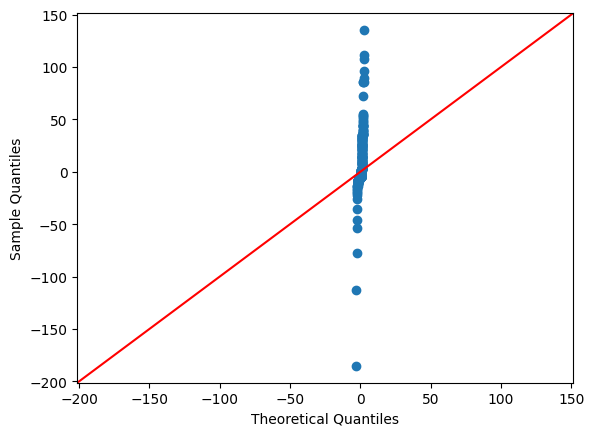

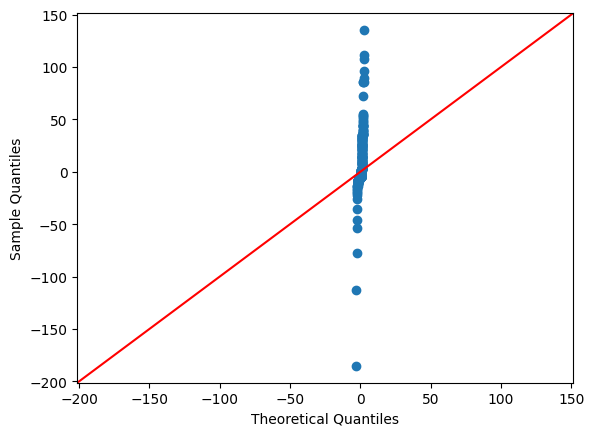

In [12]:
#- проверить выполнение условия адекватности каждой из полученных моделей регрессии (нормальность распределения регрессионных остатков), построив Q-Q график;
residuals = model.resid
sm.qqplot(residuals, line ='45')

In [13]:
 #- выбрать еще 2-3 функциональные формы (квадратическая, логарифмическая, экспоненциальная, обратная и т.д.) зависимости количества активных действий от просмотров, оценить коэффициенты для каждого вида зависимости,  проверить выполнение условия адекватности моделей;
    #- выбрать оптимальную модель на основании коэффициента детерминации;
    #- с помощью оптимальной модели найти прогноз количества активных действий в курсе, произвольным образом задав для него значение просмотров.